In [16]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
# Configuramos el estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

In [17]:
# ----
# PARTE 1: GENERADOR DE DATASET ALEATORIO
# ----

def generate_custom_dataset(n_samples=2000, center_box=(-8, 8), random_state=None):
    n_centers = np.random.randint(1, 21)
    np.random.seed(random_state)
    min_distance = 3.0
    centers = []
    max_attempts = 1000

    for _ in range(n_centers):
        attempts = 0
        while attempts < max_attempts:
            candidate = np.random.uniform(center_box[0], center_box[1], size=(2,))
            if not centers:
                centers.append(candidate)
                break
            distances = [np.linalg.norm(candidate - center) for center in centers]
            min_dist = min(distances)
            if min_dist >= min_distance:
                centers.append(candidate)
                break
            attempts += 1
        if attempts == max_attempts:
            min_distance *= 0.9
            centers.append(np.random.uniform(center_box[0], center_box[1], size=(2,)))

    centers = np.array(centers)
    cluster_std = np.random.uniform(0.1, 0.6, size=n_centers)
    X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    return X, y, centers

In [18]:
# ----
# PARTE 2: FUNCIONES PARA VISUALIZACIÓN
# ----

def plot_raw_data(X):
    """Visualización básica del dataset crudo sin colores ni procesamiento."""
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', alpha=0.5)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.title("Dataset Crudo - Visualización", fontsize=14)
    plt.grid(True, alpha=0.2)
    plt.show()

def plot_centroids(centroids):
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.8, marker='+', label='Centroides')
    plt.legend()

def plot_clusters(X, y, centroids):
    """Visualiza los clusters asignados por KMeans."""
    plt.scatter(X[:, 0], X[:, 1], c='black', s=10, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=100, linewidths=2, color='blue', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=200, linewidths=3, color='red', zorder=11, alpha=1)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.title("Clusters Asignados", fontsize=14)
    plt.grid(True, alpha=0.2)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    """Visualiza las fronteras de decisión del modelo KMeans."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    if show_centroids:
        plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], c='red', s=100, alpha=0.8, marker='+', label='Centroides')
    if show_xlabels:
        plt.xlabel("Feature 1", fontsize=12)
    if show_ylabels:
        plt.ylabel("Feature 2", fontsize=12)

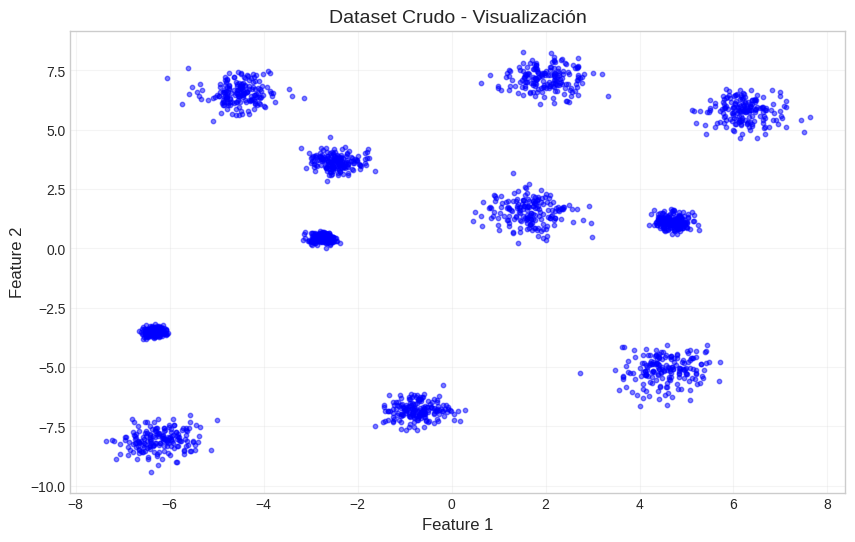

Coordenadas de los centroides generados:
[[-6.33814291 -3.50509396]
 [ 6.24326768  5.7793532 ]
 [ 4.55730749 -5.06925749]
 [ 4.70624588  1.12307859]
 [-0.72897247 -6.83669202]
 [ 1.63308431  1.54345048]
 [-4.50384827  6.54144403]
 [-6.20554006 -7.98789074]
 [-2.45397373  3.65084149]
 [-2.7464371   0.41416395]
 [ 2.06593437  7.11204014]]


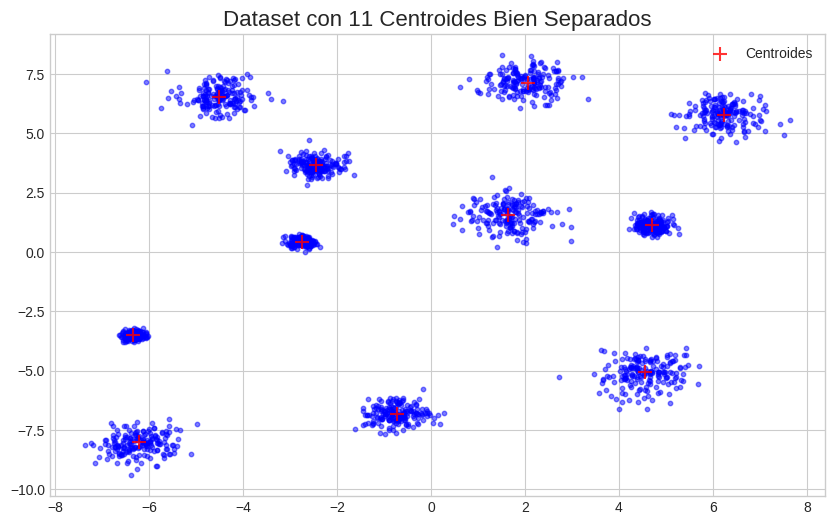

In [19]:
# ----
# PARTE 3: GENERAMOS Y VISUALIZAMOS EL DATASET
# ----

X, y_true, centers = generate_custom_dataset(n_samples=2000)

# Visualizamos el dataset crudo
plot_raw_data(X)

# Imprimimos las coordenadas de los centroides generados
print("Coordenadas de los centroides generados:")
print(centers)

# Visualizamos el dataset generado con centroides
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', alpha=0.5)
plot_centroids(centers)
plt.title(f"Dataset con {len(centers)} Centroides Bien Separados", fontsize=16)
plt.show()

# **APLICANDO K_MEANS**

Distancia Euclidiana

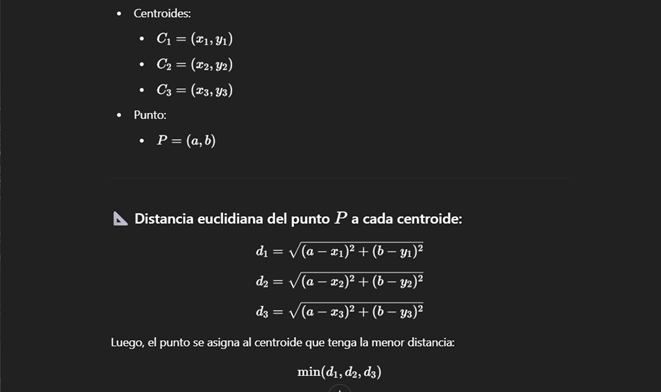

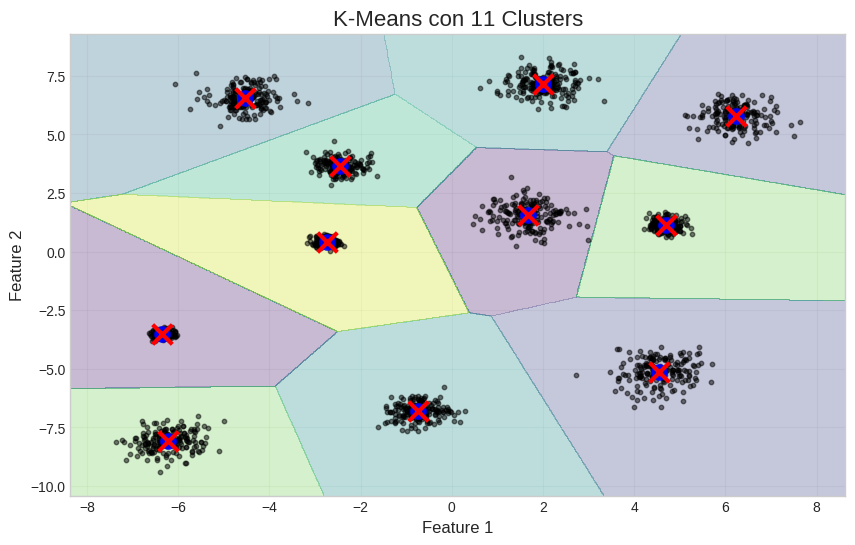

In [20]:
# ----
# PARTE 4: APLICAMOS K-MEANS CON EL NÚMERO CORRECTO DE CLUSTERS
# ----

kmeans = KMeans(n_clusters=len(centers), random_state=None)
y_pred = kmeans.fit_predict(X)

# Visualizamos los resultados
plt.figure(figsize=(10, 6))
plot_decision_boundaries(kmeans, X)
plot_clusters(X, y_pred, kmeans.cluster_centers_)
plt.title(f"K-Means con {len(centers)} Clusters", fontsize=16)
plt.show()

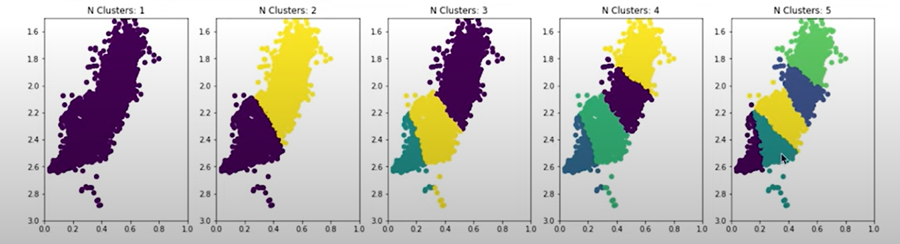

# **¿Cómo saber el valor de k?**

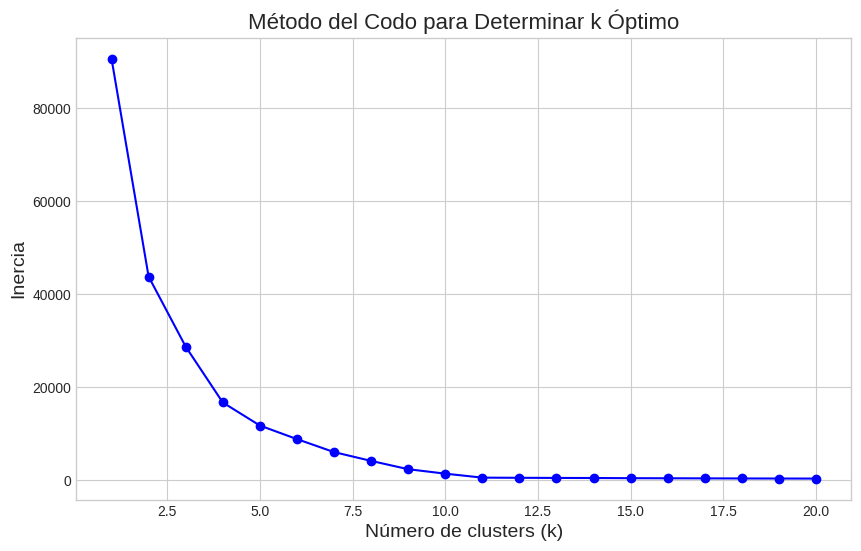

In [21]:
# ----
# PARTE 9: MÉTODO DEL CODO PARA ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS
# ----

k_range = range(1, 21)
inertias = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=None, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del Codo para Determinar k Óptimo", fontsize=16)
plt.grid(True)
plt.show()

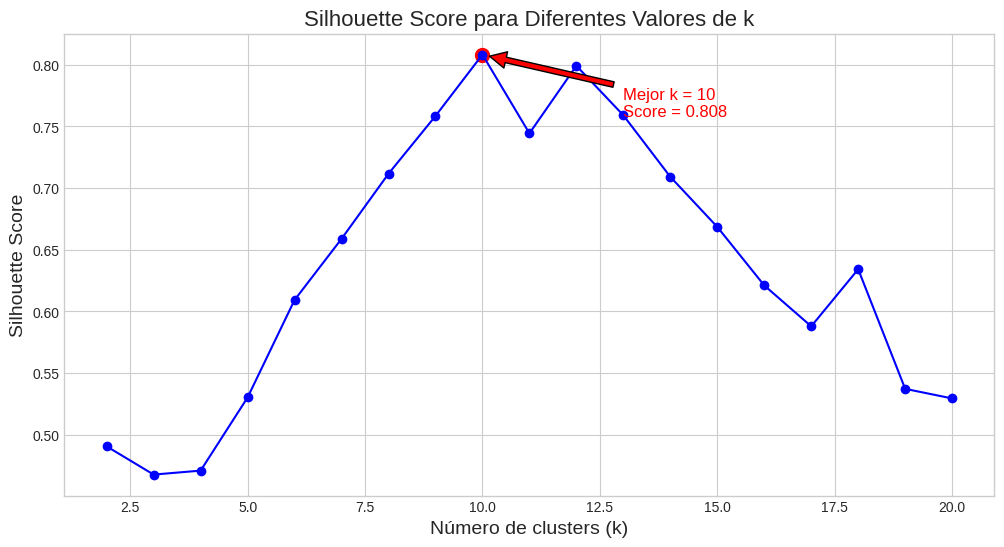

In [22]:
# ----
# PARTE 10: SILHOUETTE SCORE
# ----

kmeans_per_k = [KMeans(n_clusters=k, random_state=None).fit(X) for k in range(1, 21)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
optimal_k_silhouette = np.argmax(silhouette_scores) + 2

plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score para Diferentes Valores de k", fontsize=16)
plt.grid(True)
plt.annotate(f'Mejor k = {optimal_k_silhouette}\nScore = {silhouette_scores[optimal_k_silhouette-2]:.3f}',
             xy=(optimal_k_silhouette, silhouette_scores[optimal_k_silhouette-2]),
             xytext=(optimal_k_silhouette+3, silhouette_scores[optimal_k_silhouette-2]-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')
plt.scatter([optimal_k_silhouette], [silhouette_scores[optimal_k_silhouette-2]], c='red', s=100)
plt.show()

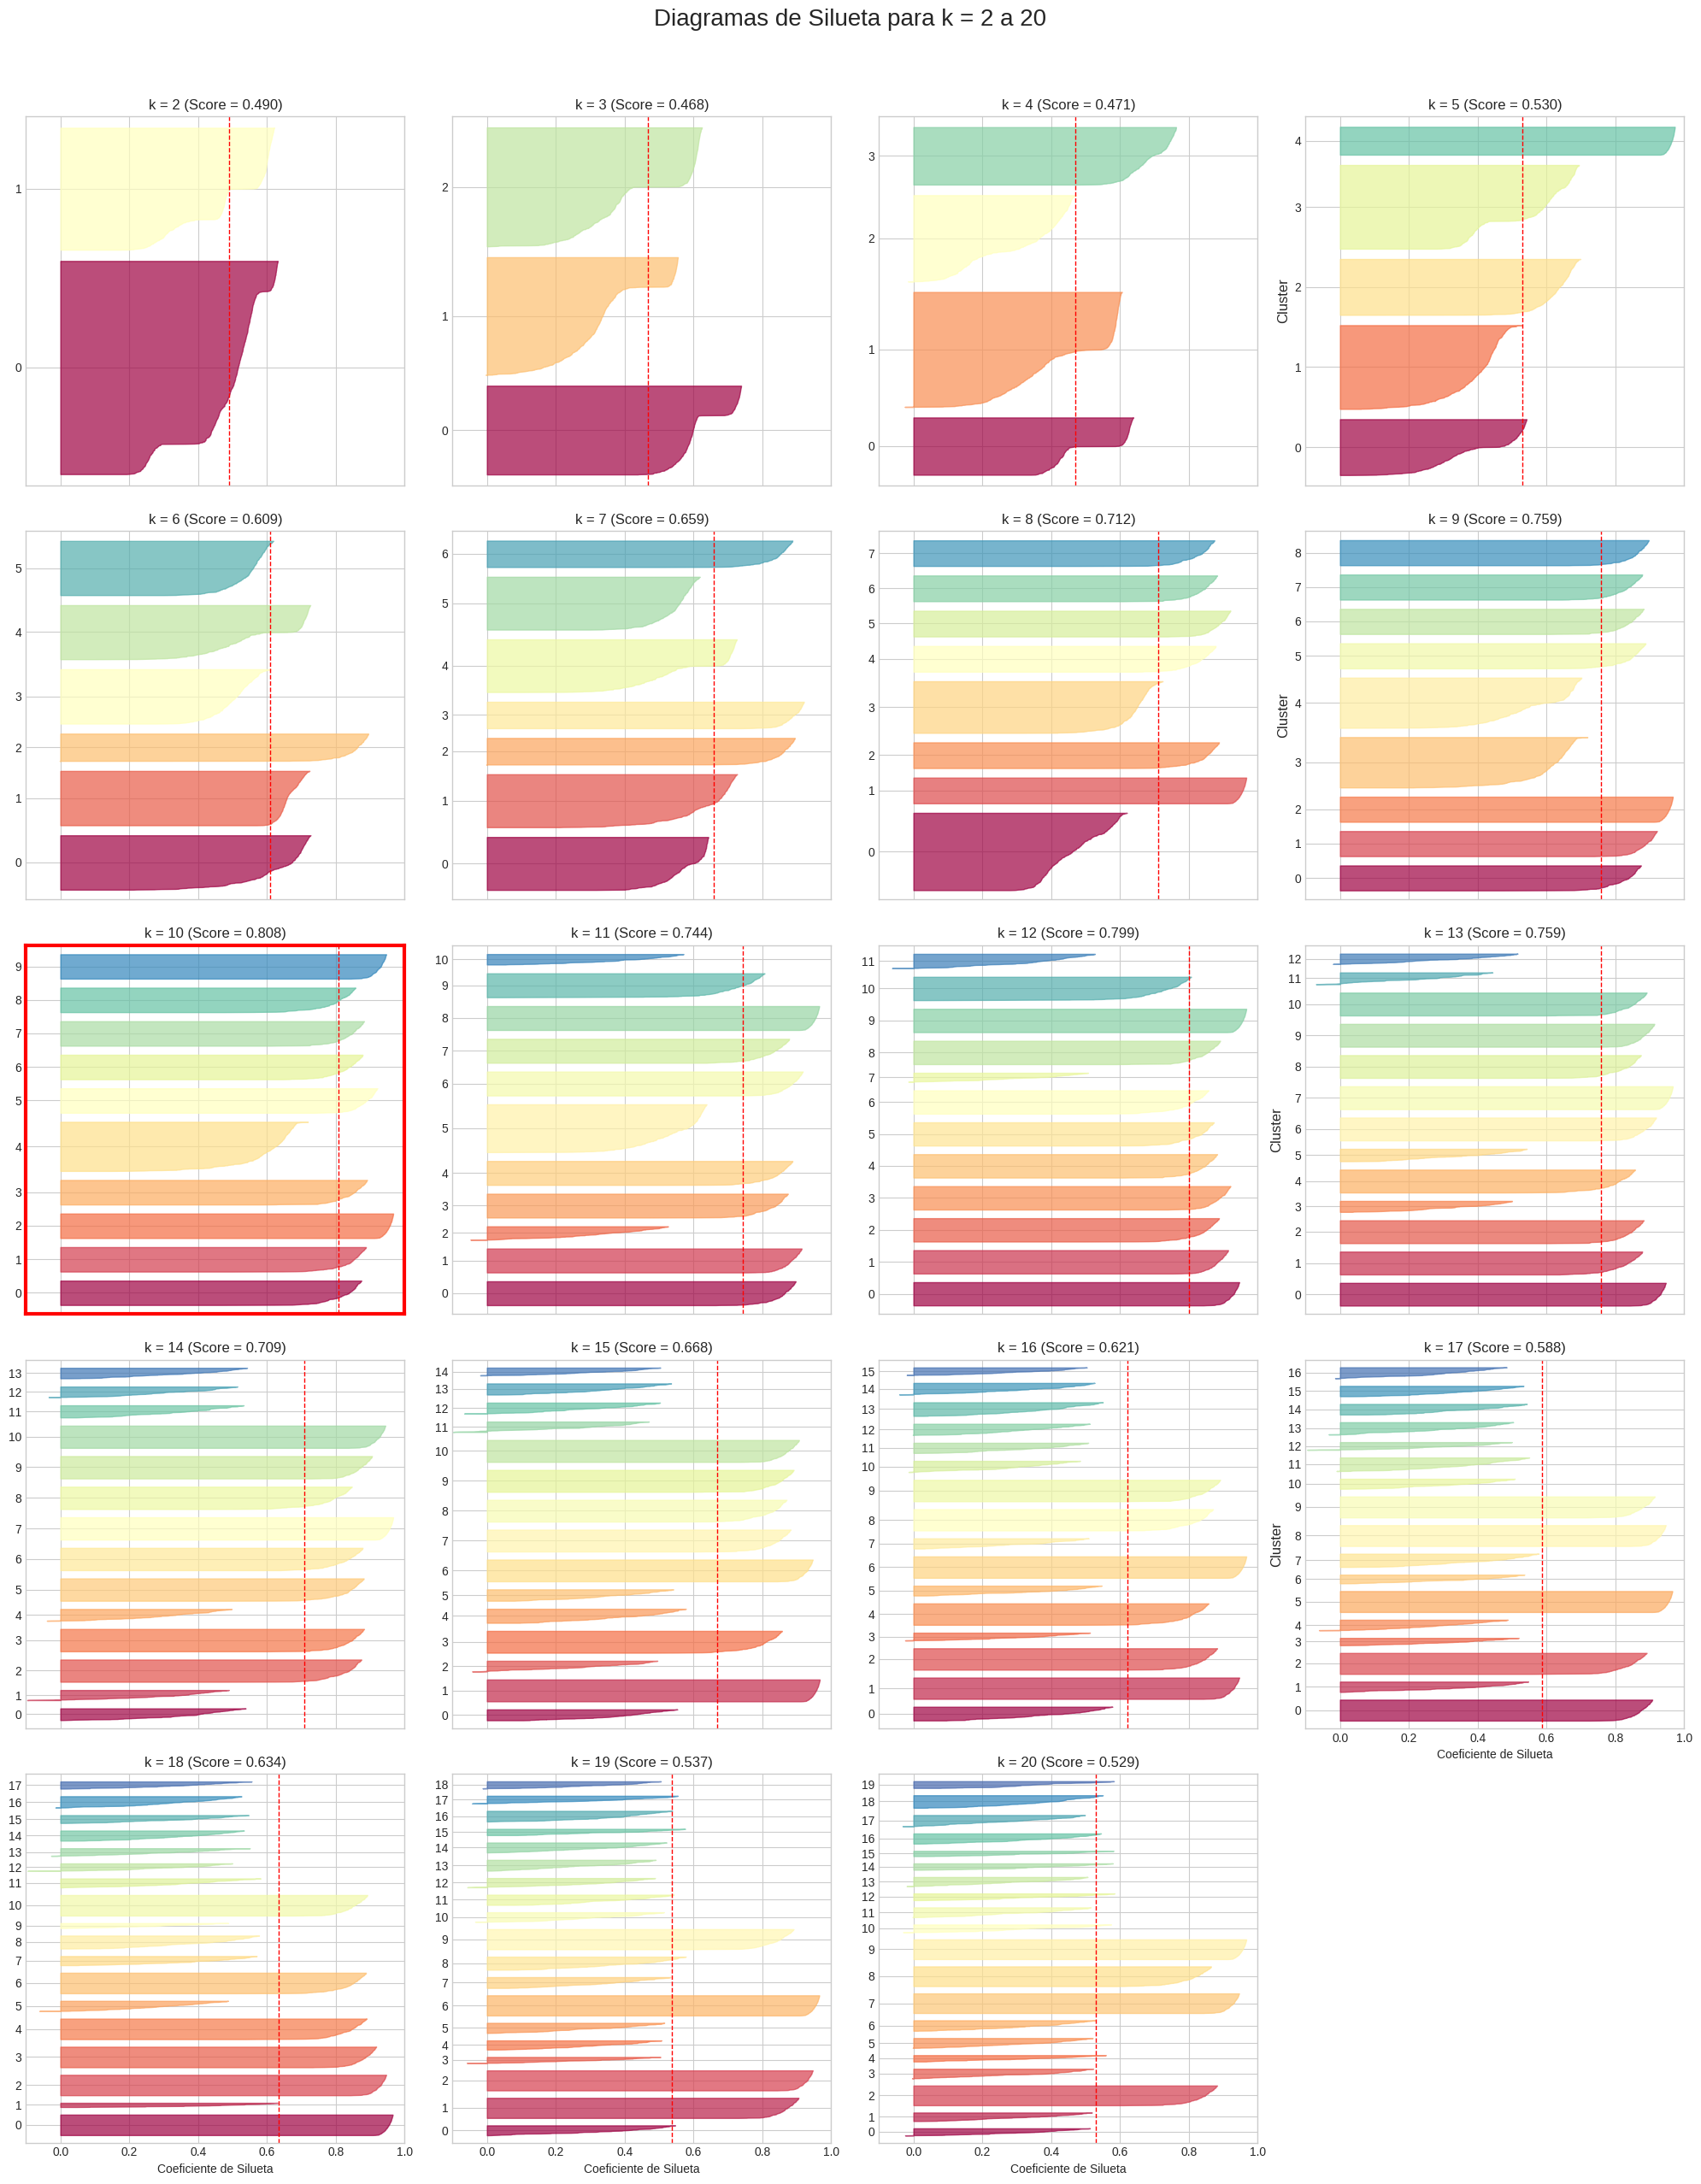

In [23]:
# ----
# PARTE 11: DIAGRAMAS DE SILUETA COMPLETOS (PARA TODOS LOS K)
# ----

plt.figure(figsize=(20, 25))
plt.suptitle("Diagramas de Silueta para k = 2 a 20", fontsize=20, y=1.02)

for k in range(2, 21):
    plt.subplot(5, 4, k-1)
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []

    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()
        color = mpl.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if (k-1) % 4 == 0:
        plt.ylabel("Cluster", fontsize=12)
    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--", linewidth=1)
    if k == optimal_k_silhouette:
        for spine in plt.gca().spines.values():
            spine.set_color('red')
            spine.set_linewidth(3)
    plt.title(f"k = {k} (Score = {silhouette_scores[k-2]:.3f})", fontsize=12)
    plt.xlim(-0.1, 1)
    plt.ylim(0, pos)
    if k > 16:
        plt.xlabel("Coeficiente de Silueta", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()